In [51]:
# data wrangling
import pandas as pd
import numpy as np

# object serialization
import pickle

# GPU acceleration
from numba import jit, cuda

#Timer
from timeit import default_timer as timer 

# ML Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

# ML metrics
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score

# Data Splitting
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate


In [89]:
# read in data
#64x64 data
df = pd.read_csv("data\\chest_xray_train.csv")

#128x128 data
# df = pd.read_csv("C:/Users/conor/OneDrive/Desktop/school/Data Science Minor Independent Study/chest-xray-research/datasets/chest_xray_train_large.csv")

# get all pixel columns
selected_features = list(df.columns)
selected_features.remove("file_name")
selected_features.remove("class_id")

# Set train and target
X = df[selected_features]
y = df['class_id']



In [5]:
# # Get random split data, only do this once, model should not make data any different
# model = svm.SVC()
# cross_val = cross_validate(estimator=model,
#                            X=X,
#                            y=y,
#                            cv=10,
#                            n_jobs = -1,
#                            return_train_score = True,
#                            return_estimator = True,
#                            return_indices = True)



In [8]:
# import random
# index = random.randint(0,10)
# print(index)

3


In [10]:
# train_data = cross_val['indices']['train'][3]
# test_data = cross_val['indices']['test'][3]

In [31]:
# # Save indices
# with open('static_data/train.pickle','wb') as handle:
#     pickle.dump(train_data, handle)

# with open('static_data/test.pickle','wb') as handle:
#     pickle.dump(test_data, handle)

In [82]:
# @jit(target_backend='cuda')	
def build_and_eval_cross_validate_model(model, X, y):

    # Load indicies
    with open('static_data/train.pickle','rb') as handle:
        train_indices = pickle.load(handle)

    with open('static_data/test.pickle','rb') as handle:
        test_indices = pickle.load(handle)

    # Get training and test data
    X_train, X_test = X.iloc[train_indices,:], X.iloc[test_indices,:] 
    y_train, y_test = y[train_indices], y[test_indices]

    # Fit data to model
    model.fit(X_train,y_train)

    # Get metrics
    y_pred = model.predict(X_test)
    print(metrics.classification_report(y_test, y_pred))
    acc = accuracy_score(y_pred, y_test) # see scores
    print(acc)
    cm = confusion_matrix(y_test, y_pred, labels = model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    
    disp.plot()
    
    return cross_val

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       123
           1       0.77      0.89      0.83       224
           2       0.68      0.46      0.55       120

    accuracy                           0.78       467
   macro avg       0.77      0.75      0.75       467
weighted avg       0.77      0.78      0.77       467

0.7815845824411135


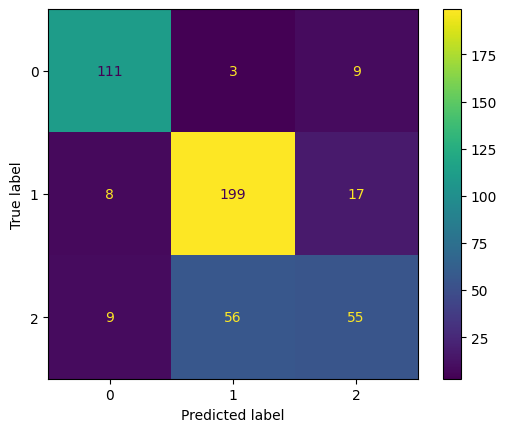

In [83]:
model = svm.SVC()
svm_data = build_and_eval_cross_validate_model(model, X, y)

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       123
           1       0.76      0.88      0.81       224
           2       0.62      0.42      0.50       120

    accuracy                           0.76       467
   macro avg       0.74      0.72      0.72       467
weighted avg       0.75      0.76      0.75       467

0.7580299785867237


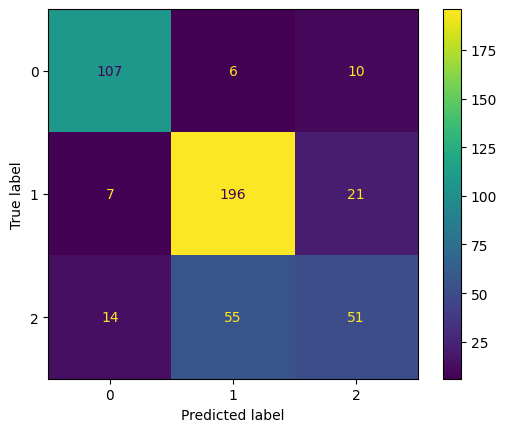

In [84]:
model_rfc = RandomForestClassifier()
rfcdata = build_and_eval_cross_validate_model(model_rfc, X, y)

C:\Users\conor\anaconda3\envs\ImageRecognition\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.83      0.85      0.84       123
           1       0.74      0.82      0.78       224
           2       0.53      0.41      0.46       120

    accuracy                           0.72       467
   macro avg       0.70      0.69      0.69       467
weighted avg       0.71      0.72      0.71       467

0.7237687366167024


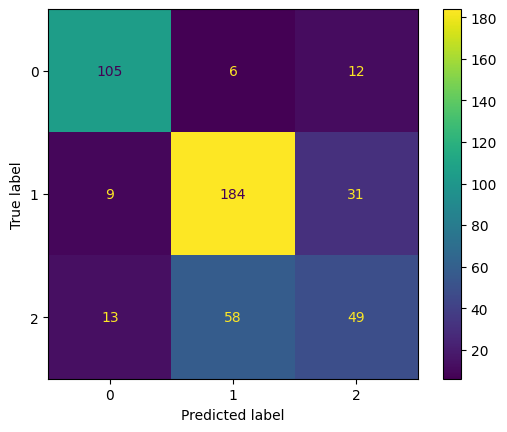

In [85]:
model_lr = LogisticRegression()
lr_data = build_and_eval_cross_validate_model(model_lr, X, y)

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       123
           1       0.73      0.82      0.77       224
           2       0.51      0.44      0.47       120

    accuracy                           0.72       467
   macro avg       0.71      0.69      0.70       467
weighted avg       0.71      0.72      0.71       467

0.7173447537473233


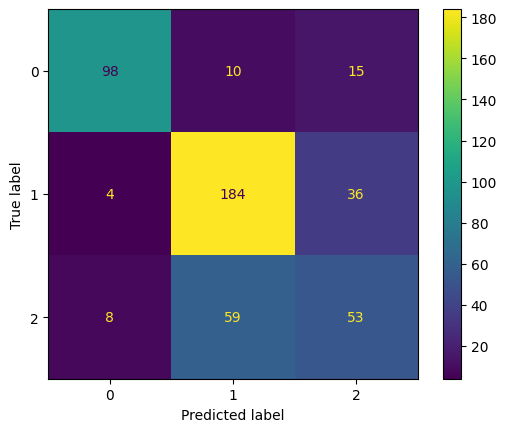

In [86]:
model_knn = KNeighborsClassifier()
knn_data = build_and_eval_cross_validate_model(model_knn, X, y)

              precision    recall  f1-score   support

           0       0.76      0.71      0.73       123
           1       0.71      0.66      0.68       224
           2       0.35      0.43      0.39       120

    accuracy                           0.61       467
   macro avg       0.61      0.60      0.60       467
weighted avg       0.63      0.61      0.62       467

0.6124197002141327


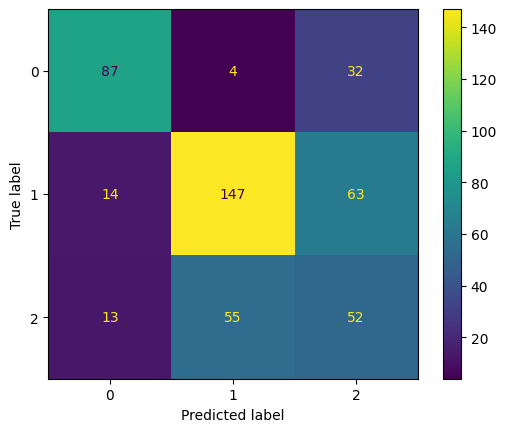

In [87]:
model_nb = MultinomialNB()
nb_data = build_and_eval_cross_validate_model(model_nb, X, y)

In [88]:
df.loc[0]

pixel0                                  4
pixel1                                  3
pixel2                                  4
pixel3                                  4
pixel4                                  4
                         ...             
pixel16381                              0
pixel16382                              0
pixel16383                              0
file_name     img_1002194571005371555.jpg
class_id                                1
Name: 0, Length: 16386, dtype: object